In [1]:
using DataFrames
using Gadfly
using Compose
using Cairo
set_default_plot_size(30cm, 12cm)

In [37]:
# Get ready
home = "/home/german/labo/17/cph_obp/"
cph_outputs = string(home, "run/apo/pre_data/outputs/")
apo_cph_outputs = string(home, "run/apo/pre_data/cph_outputs/")

ph_range = collect(30:5:75)

suffix_pka_file = "_pka"
suffix_pop_file = "_pop"

titratable_cnt = 36
protonated_fraction = Array{Float64, 2}(titratable_cnt, length(ph_range))
deprotonated_fraction = Array{Float64, 2}(titratable_cnt, length(ph_range));

### Leyendo de las pop

In [39]:
i = 0
for ph in ph_range
    i+=1
    pop_filename = string(apo_cph_outputs, ph, suffix_pop_file)
    pop_file = readdlm(pop_filename, header = true)[1][2:end, 2:end]
    if i == 1
        global titratable_resnames = convert(Array{String}, pop_file[:, 1]) # const
        global titratable_resis = convert(Array{Int64}, pop_file[:, 2]) # const
    end

    k = 0
    for resname in titratable_resnames
        k+=1
        if resname == "GL4"
            deprotonated_fraction[k, i] = pop_file[k, 3:end][1]
        elseif resname == "AS4"
            deprotonated_fraction[k, i] = pop_file[k, 3:end][1]
        elseif resname == "HIP"
            deprotonated_fraction[k, i] = pop_file[k, 3:end][1]
        elseif resname == "LYS"
            deprotonated_fraction[k, i] = pop_file[k, 3:end][1]
        end
    end            
end

### Leyendo de las pka

In [38]:
i = 0
for ph in ph_range
    i+=1
    pka_filename = string(apo_cph_outputs, ph, suffix_pka_file)
    pka_file = readdlm(pka_filename, header = true)[1][:, 2:end-1]
    
    if i == 1
        global titratable_resnames = convert(Array{String}, pop_file[:, 1]); # const
        global titratable_resis = convert(Array{Int64}, pop_file[:, 2]); # const
    end

    protonated_fraction[:, i] = pka_file[1:end-1, end-1];
end

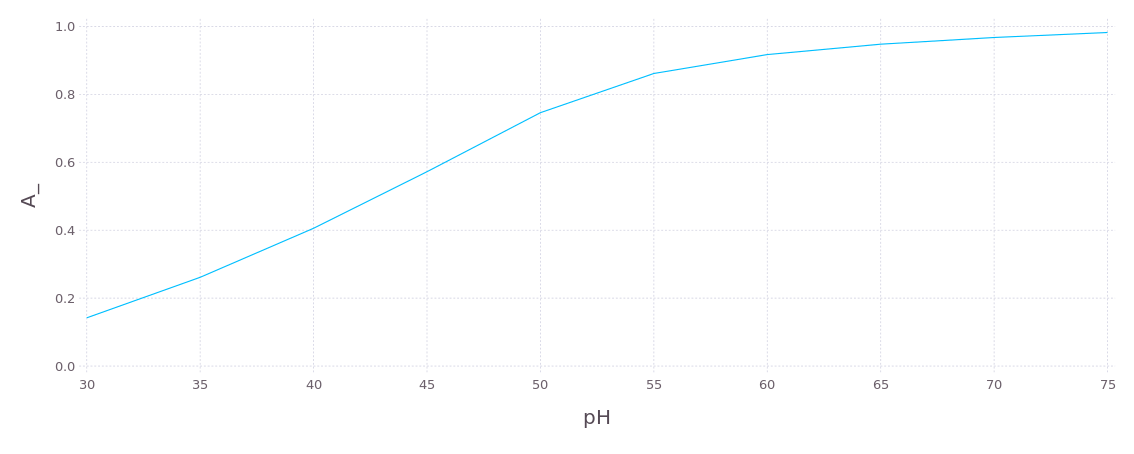

In [41]:
i = 1
plot(DataFrame(A_ = deprotonated_fraction[i, :], pH = ph_range), y = "A_", Geom.line, x = "pH",
    
#Guide.title("NEQ run (1-10)ps. Ligand Temperature"),
#Coord.cartesian(ymin = 400, ymax = 1200, xmax = 10, xmin = 1),
#Guide.yticks(ticks = collect(400:200:1200)),
Guide.xticks(ticks = ph_range),
    
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

In [35]:
1 - protonated_fraction

36×10 Array{Float64,2}:
 0.142  0.261  0.406  0.572  0.746  0.862  0.917  0.948  0.968  0.982
 0.267  0.445  0.638  0.805  0.904  0.955  0.981  0.993  0.998  0.999
 0.0    0.0    0.0    0.0    0.0    0.001  0.0    0.001  0.001  0.002
 0.004  0.011  0.02   0.03   0.054  0.09   0.152  0.299  0.552  0.79 
 0.07   0.128  0.225  0.385  0.609  0.826  0.928  0.962  0.978  0.988
 0.0    0.0    0.0    0.001  0.003  0.004  0.007  0.015  0.041  0.103
 0.009  0.022  0.057  0.151  0.346  0.613  0.829  0.935  0.972  0.989
 0.693  0.831  0.916  0.96   0.983  0.994  0.997  0.999  1.0    1.0  
 0.0    0.0    0.0    0.001  0.001  0.001  0.003  0.005  0.01   0.026
 0.136  0.271  0.429  0.639  0.777  0.896  0.954  0.981  0.992  0.997
 0.114  0.196  0.29   0.418  0.607  0.785  0.901  0.961  0.984  0.994
 0.625  0.74   0.834  0.893  0.902  0.901  0.938  0.964  0.986  0.996
 0.079  0.115  0.157  0.232  0.379  0.567  0.718  0.837  0.922  0.966
 ⋮                                  ⋮                             

In [40]:
deprotonated_fraction

36×10 Array{Float64,2}:
 0.142061  0.261413  0.405794  0.572356  …  0.947809  0.96751   0.98231 
 0.266773  0.445184  0.638426  0.805488     0.99344   0.99789   0.99911 
 0.99986   0.99991   0.99982   0.99978      0.99943   0.99857   0.99755 
 0.996     0.98918   0.98037   0.96952      0.701177  0.447664  0.210052
 0.070121  0.127881  0.225162  0.384774     0.96229   0.97815   0.98844 
 0.99988   0.99973   0.9996    0.99874   …  0.9847    0.95924   0.897409
 0.00901   0.02248   0.057281  0.151182     0.934939  0.97177   0.98855 
 0.693397  0.830658  0.915659  0.96002      0.99928   0.99983   0.99995 
 0.9999    0.99995   0.9998    0.99942      0.99509   0.9902    0.97387 
 0.136101  0.270623  0.429014  0.639386     0.9806    0.99227   0.99666 
 0.113661  0.196192  0.290473  0.417824  …  0.96068   0.98435   0.99395 
 0.624726  0.740077  0.833698  0.893069     0.96385   0.98649   0.99552 
 0.079201  0.115341  0.157052  0.232242     0.837478  0.921639  0.96568 
 ⋮                         

In [3]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/apo/neq/temperatura/lig/", i, "corta_temp_lig"))[:, 2]
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta_lig = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_lig = DataFrame(T = T_corta_lig, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/apo/neq/temperatura/lig/", i, "larga_temp_lig"))[:, 2]
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga_lig = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_lig = DataFrame(T = T_larga_lig, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_lig = DataFrame(T = [ T_corta_lig ; T_larga_lig ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

LoadError: [91mSystemError: opening file /home/german/labo/17/pdz/run/lb/neq/temperatura/lig/1corta_temp_lig: No such file or directory[39m

## Ligand

In [5]:
pdf_T_lig = plot(df_T_lig, Geom.line, x="Time", y="T",
Guide.title("NEQ run (0-1)ps. Ligand Temperature"),
Coord.cartesian(ymin = 1000, ymax = 3000, xmax = 10),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))                                                      

LoadError: [91mUndefVarError: df_T_lig not defined[39m

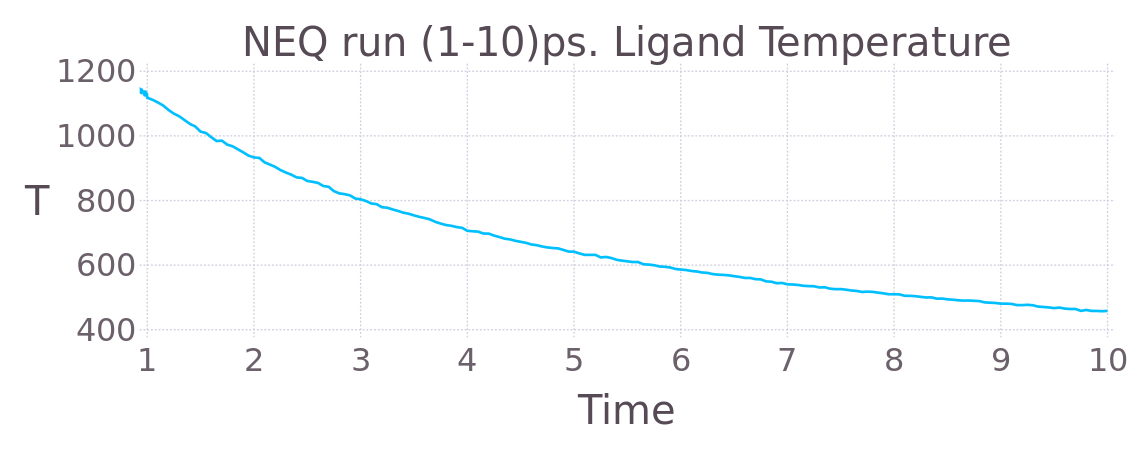

In [23]:
pdf_T_lig = plot(df_T_lig, Geom.line, x="Time", y="T",
Guide.title("NEQ run (1-10)ps. Ligand Temperature"),
Coord.cartesian(ymin = 400, ymax = 1200, xmax = 10, xmin = 1),
Guide.yticks(ticks = collect(400:200:1200)),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))                                                      